# Lecture 10-K Nearest Neighbour-Part 2

# K Nearest Neighbors with Python



## Import Libraries



In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data



In [11]:
df = pd.read_csv('Downloads/KNN_Project_Data')

In [12]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## Standardize the Variables



In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [13]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [16]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [20]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(confusion_matrix(y_test,pred))

[[109  45]
 [ 33 113]]


In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       154
           1       0.72      0.77      0.74       146

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [30]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

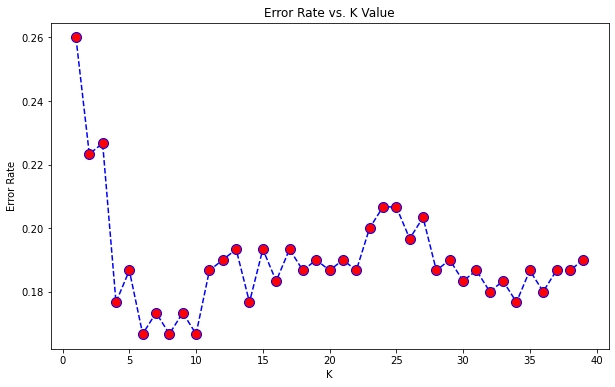

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[109  45]
 [ 33 113]]


              precision    recall  f1-score   support

           0       0.77      0.71      0.74       154
           1       0.72      0.77      0.74       146

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [35]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[114  40]
 [ 20 126]]


              precision    recall  f1-score   support

           0       0.85      0.74      0.79       154
           1       0.76      0.86      0.81       146

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.81      0.80      0.80       300

